# CMSE 802 In-class assignment: Image Analysis
## Date: 10/30/2018
## Due: 10/30/2018; 10:30 PM

### The goal of this assignment is to do some practice on image analysis.

---
### Your name: Boyao Zhu

----
### Problem Statement

As a researcher we want to compare the two different Bacterial Colonies found on a petri dish. To be consistent, let's call the bigger (dark red) colonies "Type A" and the smaller ones "Type B." Write a program that counts the two bacterial colonies and shows a graph comparing the results (pie chart, bar graph, whatever makes sense to you).  

Since no programs are perfect.  Calculate the error of your final result based on manual calculation.

----
### 1. Establishing "Ground Truth"

Consider the images below.  How do we determine if we have the "right" answer?

**Count the number of bacteria on each petri dish.  We will use this count to estimate how well our image segmentation algorithm performs. **

Text(0.5,1,'Petri_dish2.jpg')

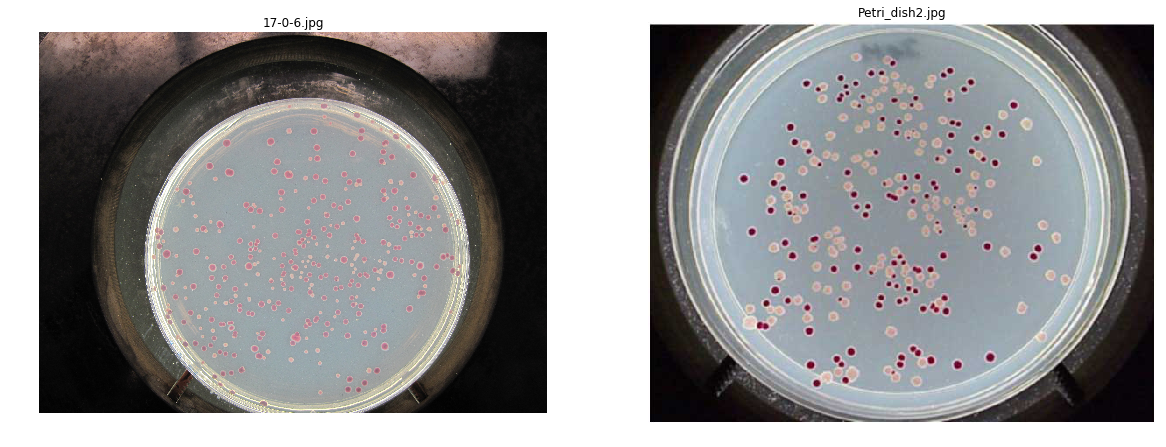

In [3]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import imageio
import matplotlib.pylab as plt

im1 = imageio.imread('17-0-6.jpg')
im2 = imageio.imread('Petri_dish2.jpg')

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.imshow(im1)
ax1.axis('off')
ax1.set_title('17-0-6.jpg')
ax2.imshow(im2)
ax2.axis('off')
ax2.set_title('Petri_dish2.jpg')

**Question:** How many of each colony type did you count in each image?

**Your answer: **

|                 | 17-0-6.jpg      | Petri_dish2.jpg |
|-----------------|:---------------:|----------------:|
|Type A           |    242          |     124         |
|Type B           |    115          |     135         |

----
### 2. Color segmentation

In the pre-class assingment, we used color segmentation to enhance the image. Copy and paste the code from the pre-class assignemt for color segmentation here. For your convenience, your can trim off the regions away from the dishes in the image. 

In [81]:
# Your code:
from ipywidgets import interact,fixed


def color_threshold(im, rmin=0,rmax=255,gmin=0,gmax=255,bmin=0,bmax=255):
    # Pull out the red, gree and blue matrixes
    r = im[:,:,0];
    g = im[:,:,1];
    b = im[:,:,2];
    b_img = ((r > rmin) & (r < rmax) & 
             (g > gmin) & (g < gmax) & 
             (b > bmin) & (b < bmax));
    print("rmin="+str(rmin))
    print("rmax="+str(rmax))
    print("gmin="+str(gmin))
    print("gmax="+str(gmax))
    print("bmin="+str(bmin))
    print("bmax="+str(bmax))
    plt.figure(figsize = (5,12))
    plt.imshow(b_img);
    plt.show()
    return b_img;

w = interact(color_threshold, im=fixed(im1),
         rmin=(-1,256), rmax=(-1,256), 
         gmin=(-1,256), gmax=(-1,256), 
         bmin=(-1,256), bmax=(-1,256),__manual=True);

w = interact(color_threshold, im=fixed(im2),
         rmin=(-1,256), rmax=(-1,256), 
         gmin=(-1,256), gmax=(-1,256), 
         bmin=(-1,256), bmax=(-1,256),__manual=True);





interactive(children=(IntSlider(value=0, description='rmin', max=256, min=-1), IntSlider(value=255, descriptio…

interactive(children=(IntSlider(value=0, description='rmin', max=256, min=-1), IntSlider(value=255, descriptio…

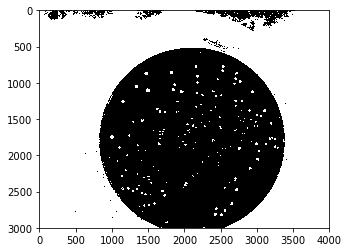

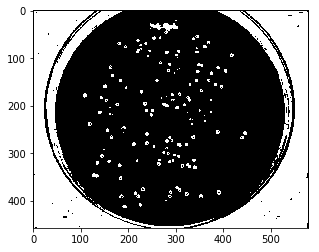

In [86]:
# Your code:
r = im1[:,:,0]
g = im1[:,:,1]
b = im1[:,:,2]

im_binary = ((r>0)&(r<243)&(g>0)&(g<133)&(b>0)&(b<191));

#im_binary[0:500,0:4000]=0
#im_binary[0:3000,0:800]=0

plt.imshow(im_binary, "gray")
plt.show()

r = im2[:,:,0]
g = im2[:,:,1]
b = im2[:,:,2]

im_binary2 = ((r>0)&(r<243)&(g>0)&(g<133)&(b>0)&(b<191));
plt.imshow(im_binary2, "gray")
plt.show()


---
### 3. Binary Image object counting
Investigate the function ndimage.measurements.label( ), and write a code to use it to count the feature of the your bindary image. 

244


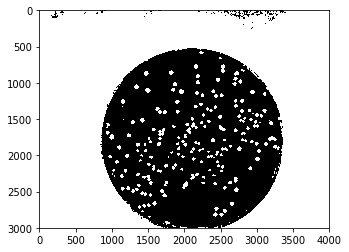

133


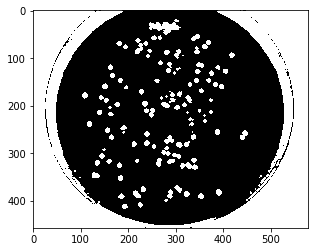

In [92]:
# Your code:


im_dilation = ndimage.binary_dilation(im_binary, iterations=10)
labeled_array, num_features = ndimage.measurements.label(im_dilation)

print (num_features)

plt.imshow(im_dilation, "gray")
plt.show()

im_dilation2 = ndimage.binary_dilation(im_binary2, iterations=2)
labeled_array, num_features = ndimage.measurements.label(im_dilation2)

print (num_features)

plt.imshow(im_dilation2, "gray")
plt.show()



**Question:** How does this compare with the number of colonies counted by hand? 

Much closer

----
### 4. Automated colony counting

Write a program to count both colony types (A and B) and report your best results side-by-side with the counts estimated by hand.  Make your results easy to read. You can use the dilation and erosion functions and iterate the processes to get a good result as you have done in the pre-class assignment

In [106]:
# Your code:
print ("For the first picture")
im_dilation = ndimage.binary_dilation(im_binary, iterations=10)
labeled_array, num_features = ndimage.measurements.label(im_dilation)

print ("The number of type A is ", num_features)

im_dilation = ndimage.binary_dilation(im_binary, iterations=30)
labeled_array, num_features = ndimage.measurements.label(im_dilation)

print ("The number of type B is ", num_features)



##########################################################
print ("For the second picture")

im_dilation2 = ndimage.binary_dilation(im_binary2, iterations=2)
labeled_array, num_features = ndimage.measurements.label(im_dilation2)

print ("The number of type A is ", num_features)

im_dilation2 = ndimage.binary_dilation(im_binary2, iterations=2)
im_dilation2 = ndimage.binary_erosion(im_dilation2, iterations=1)
labeled_array, num_features = ndimage.measurements.label(im_dilation2)

print ("The number of type B is ", num_features)



For the first picture
The number of type A is  244
The number of type B is  118
For the second picture
The number of type A is  133
The number of type B is  141


### Congratulations, we're done!

** Don't forget to add your names to the top!!**

Log into the course D2L website (d2l.msu.edu) and go to "Assessments > Assingments > In-class Assignment 20181030".